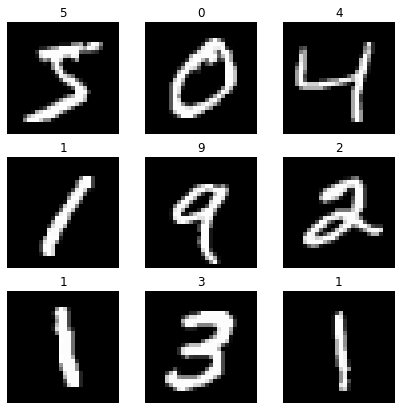

94765736/94765736 [==============================] - 650s 7us/step
Epoch 1/10
 151/1875 [=>............................] - ETA: 1:14:59 - loss: 0.8664 - acc: 0.8156

KeyboardInterrupt: 

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
import numpy as np
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

plt.figure(figsize=(7,7))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap="gray")
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , x_train.shape[2]))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_test.shape[2]))

x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

x_train=np.stack((x_train,)*3,axis=-1)
x_test=np.stack((x_test,)*3,axis=-1)

model=tf.keras.Sequential()
model.add(ResNet50(include_top=False,pooling="avg",weights="imagenet"))
model.add(Dense(512,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['acc'])

model.fit(x_train,y_train,batch_size = 32 , epochs = 10)

history=model.evaluate(x_test,y_test,verbose=0)
acc=history[1]*100
print("%.2f" % acc,"%")